In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, MaxPooling1D, Conv1D, SpatialDropout1D, Dropout, LSTM, GRU
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
df = pd.read_csv('./nlp/USA_Today.csv')

In [37]:
df.head()

,date,timestamp,title,level2,level3
0,2012/10/01,1349064000000,"Catchings, January help Fever even series with...",sports,wnba
1,2012/10/01,1349064000000,Kyle Busch rants on radio after his Toyota fal...,sports,nascar
2,2012/10/01,1349064000000,Schwarzenegger says 'You can't run from your m...,life,books
3,2012/10/01,1349064000000,Ryder Cup Day 3,sports,golf
4,2012/10/01,1349064000000,Regular officials blow another big call agains...,gameon,NaN


In [38]:
text = df['title']
tags = df['level2']

In [39]:
tokinezer_text = Tokenizer(num_words=10000)
tokinezer_tags = Tokenizer()
tokinezer_tags.fit_on_texts(tags)

In [40]:

tokinezer_text.fit_on_texts(text)

In [41]:
tokinezer_text.word_index

{'to': 1,
 'in': 2,
 'for': 3,
 'the': 4,
 'of': 5,
 'on': 6,
 'a': 7,
 'with': 8,
 'at': 9,
 'and': 10,
 'new': 11,
 'is': 12,
 'after': 13,
 'from': 14,
 'no': 15,
 'over': 16,
 'as': 17,
 'win': 18,
 '2': 19,
 'state': 20,
 'trump': 21,
 '3': 22,
 '1': 23,
 'by': 24,
 '5': 25,
 'game': 26,
 'out': 27,
 'top': 28,
 'up': 29,
 '4': 30,
 'beat': 31,
 'be': 32,
 'past': 33,
 'will': 34,
 'off': 35,
 'best': 36,
 'says': 37,
 'year': 38,
 'you': 39,
 'first': 40,
 'has': 41,
 'nfl': 42,
 'more': 43,
 'are': 44,
 'beats': 45,
 'day': 46,
 'not': 47,
 'this': 48,
 's': 49,
 'back': 50,
 'lead': 51,
 'how': 52,
 'season': 53,
 'about': 54,
 'u': 55,
 'your': 56,
 'big': 57,
 'world': 58,
 '10': 59,
 'coach': 60,
 'leads': 61,
 'his': 62,
 '6': 63,
 'wins': 64,
 'scores': 65,
 'week': 66,
 'get': 67,
 'what': 68,
 'cup': 69,
 'open': 70,
 'vs': 71,
 'man': 72,
 '7': 73,
 'it': 74,
 'gets': 75,
 'all': 76,
 '0': 77,
 'us': 78,
 'time': 79,
 'home': 80,
 'can': 81,
 'against': 82,
 'into': 83,

In [42]:
sequences_text = tokinezer_text.texts_to_sequences(text)
sequences_tags_1 = tokinezer_tags.texts_to_sequences(tags)

In [43]:
print(sequences_tags_1[:100])

[[1], [1], [3], [1], [11], [3], [1], [1], [1], [1], [2], [3], [1], [5], [4], [1], [2], [5], [3], [1], [11], [1], [11], [1], [1], [1], [1], [11], [1], [1], [1], [6], [3], [1], [1], [1], [1], [1], [1], [1], [1], [12], [1], [1], [1], [2], [1], [3], [1], [14], [2], [19], [2], [2], [2], [2], [3], [2], [2], [11], [2], [11], [3], [13], [2], [2], [8], [1], [1], [8], [13], [11], [18], [17], [3], [2], [21], [27], [8], [18], [2], [4], [11], [4], [2], [8], [5], [29], [8], [16], [4], [5], [11], [18], [19], [1], [3], [13], [8], [14]]


In [44]:

df['clean_tags'] = sequences_tags_1
df.head()

,date,timestamp,title,level2,level3,clean_tags
0,2012/10/01,1349064000000,"Catchings, January help Fever even series with...",sports,wnba,[1]
1,2012/10/01,1349064000000,Kyle Busch rants on radio after his Toyota fal...,sports,nascar,[1]
2,2012/10/01,1349064000000,Schwarzenegger says 'You can't run from your m...,life,books,[3]
3,2012/10/01,1349064000000,Ryder Cup Day 3,sports,golf,[1]
4,2012/10/01,1349064000000,Regular officials blow another big call agains...,gameon,NaN,[11]


In [45]:
x_train = pad_sequences(sequences_text)
x_train[:15]

array([[   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        1627,  111, 3140,  759,  167,    8, 1398],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0, 1109, 1677,
           6, 2495,   13,   62, 2343,  790,  564],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
        6330,   37, 5013,  575,  149,   14,   56],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0, 2466,   69,   46,   22],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0, 2551,  852, 2208,  232,
          57,  409,   82,    4,  512,  961,  592],
     

In [46]:
tags = pad_sequences(sequences_tags_1)
tags[:15]

array([[ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 11],
       [ 0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  2],
       [ 0,  0,  0,  0,  3],
       [ 0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  5],
       [ 0,  0,  0,  0,  4]], dtype=int32)

In [47]:
df = df.fillna(0)

In [67]:
row = []
for i in df['clean_tags']:
    if i != []:
        row.append(i[0])
    else:
        row.append(0)

In [68]:
y_train = utils.to_categorical(row, 91)

In [69]:
y_train

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [74]:
model_lstm = Sequential()
model_lstm.add(Embedding(10000, 128, input_length=29))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(40, return_sequences=True))
model_lstm.add(LSTM(40))
model_lstm.add(Dense(91, activation='sigmoid'))

In [75]:
model_lstm.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', 'AUC'])

In [76]:
model_lstm_save_path = 'best_model_lstm.h5'
checkpoint_callback_lstm = ModelCheckpoint(model_lstm_save_path,
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [78]:
history_lstm = model_lstm.fit(x_train,
                              y_train,
                              epochs=2,
                              batch_size=512,
                              validation_split=0.2,
                              callbacks=[checkpoint_callback_lstm])

Epoch 1/2
3254/3254 [==============================] - ETA: 0s - loss: 0.0292 - accuracy: 0.4594 - auc: 0.9692
Epoch 1: val_accuracy improved from -inf to 0.50879, saving model to best_model_lstm.h5
3254/3254 [==============================] - 1198s 368ms/step - loss: 0.0292 - accuracy: 0.4594 - auc: 0.9692 - val_loss: 0.0259 - val_accuracy: 0.5088 - val_auc: 0.9840
Epoch 2/2
3254/3254 [==============================] - ETA: 0s - loss: 0.0275 - accuracy: 0.4594 - auc: 0.9706
Epoch 2: val_accuracy did not improve from 0.50879
3254/3254 [==============================] - 1121s 345ms/step - loss: 0.0275 - accuracy: 0.4594 - auc: 0.9706 - val_loss: 0.0257 - val_accuracy: 0.5088 - val_auc: 0.9840


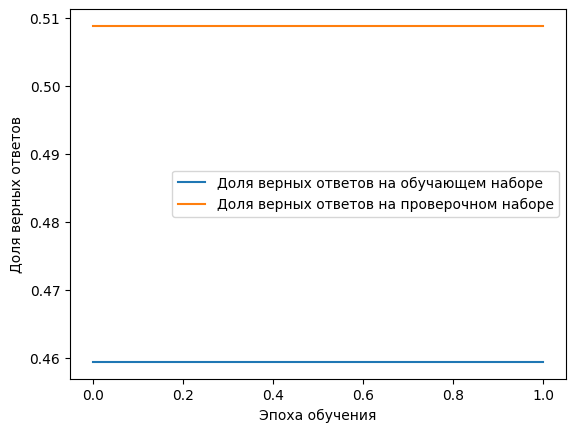

In [79]:
plt.plot(history_lstm.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history_lstm.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

In [103]:
model_lstm.load_weights(model_lstm_save_path)


In [139]:
comment = "U.S. kids exposed to 4 hours of background TV daily"


In [140]:
sequence = tokinezer_text.texts_to_sequences([comment])

In [141]:
sequence

[[55, 49, 327, 6232, 1, 30, 1888, 5, 6573, 130, 1527]]

In [142]:
data = pad_sequences(sequence)

In [143]:
data

array([[  55,   49,  327, 6232,    1,   30, 1888,    5, 6573,  130, 1527]],
      dtype=int32)

In [144]:
result = model_lstm.predict(data)

1/1 [==============================] - 0s 33ms/step


In [146]:
result

array([[1.39398471e-04, 4.22062218e-01, 2.66292959e-01, 1.01218686e-01,
        6.20175339e-02, 3.99065726e-02, 2.67518274e-02, 2.05156561e-02,
        8.29931535e-03, 5.15373517e-03, 5.86227793e-03, 4.97451052e-03,
        5.34680579e-03, 4.38904297e-03, 3.58278677e-03, 2.00849562e-03,
        2.72457185e-03, 1.83502911e-03, 1.43558951e-03, 8.23840848e-04,
        6.11675496e-04, 5.82327542e-04, 4.26029583e-04, 8.93700417e-05,
        3.60657054e-04, 3.72919545e-04, 3.22991255e-04, 2.37881919e-04,
        2.12933213e-04, 1.71276683e-04, 1.22421014e-04, 1.23200341e-04,
        1.35554394e-04, 1.20965393e-04, 1.03259750e-04, 2.10061291e-04,
        8.46074836e-05, 8.98125945e-05, 9.93064095e-05, 1.20724209e-04,
        8.03516959e-05, 1.85675774e-04, 1.60054857e-04, 8.66351111e-05,
        8.20628848e-05, 6.19426573e-05, 1.03061320e-04, 1.93138418e-04,
        1.10532841e-04, 1.05707411e-04, 9.11737516e-05, 4.88020487e-05,
        2.15003951e-04, 1.88806109e-04, 1.62475626e-04, 1.346288

In [158]:
#str(result[0].index(result[0].max()))
a = str(result[0])
a.index(a.max())

'[1.39398471e-04 4.22062218e-01 2.66292959e-01 1.01218686e-01\n 6.20175339e-02 3.99065726e-02 2.67518274e-02 2.05156561e-02\n 8.29931535e-03 5.15373517e-03 5.86227793e-03 4.97451052e-03\n 5.34680579e-03 4.38904297e-03 3.58278677e-03 2.00849562e-03\n 2.72457185e-03 1.83502911e-03 1.43558951e-03 8.23840848e-04\n 6.11675496e-04 5.82327542e-04 4.26029583e-04 8.93700417e-05\n 3.60657054e-04 3.72919545e-04 3.22991255e-04 2.37881919e-04\n 2.12933213e-04 1.71276683e-04 1.22421014e-04 1.23200341e-04\n 1.35554394e-04 1.20965393e-04 1.03259750e-04 2.10061291e-04\n 8.46074836e-05 8.98125945e-05 9.93064095e-05 1.20724209e-04\n 8.03516959e-05 1.85675774e-04 1.60054857e-04 8.66351111e-05\n 8.20628848e-05 6.19426573e-05 1.03061320e-04 1.93138418e-04\n 1.10532841e-04 1.05707411e-04 9.11737516e-05 4.88020487e-05\n 2.15003951e-04 1.88806109e-04 1.62475626e-04 1.34628848e-04\n 1.67286737e-04 3.28816423e-05 7.99492045e-05 1.46099497e-04\n 1.77028996e-04 1.25251026e-04 1.68126440e-04 1.80316099e-04\n 9.1382